# El dataset se puede descargar de: https://www.kaggle.com/datasets/imsparsh/musicnet-dataset

Una vez descargado se debe poner en la carpeta /kaggle/input/musicnet-dataset todo el contenido de la descarga

_______________________________

Para la ejecucipn de este cuaderno se deben instalar las siguientes librerias (en las versiones establecidas), tal como se muestra a continuacion

# 1) Preprocesar datos

In [1]:
import numpy as np

from libraries.Kaggle_audios import Kaggle_audios
from libraries.ProcessAudio import ProcessAudio

In [2]:
TIEMPO_SELECCIONADO = 2
ARCHIVO_FINAL_TRAIN = "data/scaler_pca_to_use/train"
ARCHIVO_FINAL_TEST = "data/scaler_pca_to_use/test"

In [3]:
def prepare_data_tensorflow(data):
    train = data[:, 1:-11]
    instrument_list = data[:,-11:]
    X = np.array(train, dtype=float)
    y = instrument_list
    return X, y

def aplicando_pca(scaler_pca, name_file, dataX, dataY):
    x_for_model = scaler_pca.transform(X=dataX)
    # print("Original", X.shape)
    np.savez_compressed(name_file + ".npz", data=x_for_model)
    np.savez_compressed(name_file + "_label.npz", data=dataY)
    
def leyendo_datos(name_file):
    x = np.load(name_file + ".npz")['data']
    y = np.load(name_file + "_label.npz")['data']
    return x, y

def Preprocesar_audios(name_file, use_train, save:bool = True):
    cortar = Kaggle_audios(config_time=TIEMPO_SELECCIONADO, train=use_train)

    print("\tLeyendo todos los archivos WAV originales")
    all_data, all_label, rate = cortar.read_data(
        limit=None, show_info=False)  # leer todos los wav y cada uno separarlos en pequeños audios de 3 segundos

    print("\tTime:", TIEMPO_SELECCIONADO, " - Input:", all_data.shape, " - Output:", all_label.shape, " - rate:", rate)

    print("\tExtrayendo caracteristicas audios")
    data = list()
    for id_audio, x in enumerate(all_data):
        processAudio = ProcessAudio()
        processAudio.set_data(x)
        data_save = processAudio.get_all(id_audio)  # Extrayendo caracteristicas audios, salen 26 caracteristicas
        data_save += all_label[id_audio].tolist()

        data.append(data_save)
        try:
            if id_audio%150 == 0:
                print("\n\t", end="")
            print(".", end="")
        except:
            print()

    print("\tConvirtiendo a numpy")
    data = np.array(data)

    if save:
        print("\tGuardando data")
        np.savez_compressed(name_file + '.npz', data)
        print("\tGuardando csv completo")

    return data

## 1.1) Leer audios, separarlos en audios mas pequeños y extraer las caracteristicas de cada uno de estos nuevos audios

In [16]:
print("Preprocesando TRAIN")
data_train = Preprocesar_audios(ARCHIVO_FINAL_TRAIN, use_train=True, save=False)
print("\tTime:", TIEMPO_SELECCIONADO, " - Train:", len(data_train))

Preprocesando TRAIN
/kaggle/input/musicnet-dataset/musicnet/musicnet/train_data/
/kaggle/input/musicnet-dataset/musicnet/musicnet/train_labels/
	Leyendo todos los archivos WAV originales

	. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
	. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
	. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
	. . . . . . . . . . . . . . . . . . . . 	Time: 2  - Input: (60851, 88200)  - Output: (60851, 11)  - rate: 44100
	Extrayendo caracteristicas audios

	........................................................

/usr/local/lib/python3.8/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


...........................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	...........

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.......................................................................................

## 1.2) Hallando el normalizador y el PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [18]:
X_train, _ = prepare_data_tensorflow(data_train)
scaler_pca = make_pipeline(StandardScaler(), PCA())
scaler_pca.fit(X_train)

modelo_pca = scaler_pca.named_steps['pca']

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.20531659 0.34142386 0.44957409 0.52833128 0.59995738 0.66376046
 0.72152238 0.76276767 0.79714684 0.82637544 0.85194989 0.87438054
 0.89286343 0.90959903 0.92566873 0.94035754 0.95189754 0.9615481
 0.970153   0.97822713 0.98401124 0.98941187 0.99362307 0.99698995
 0.99909628 1.        ]


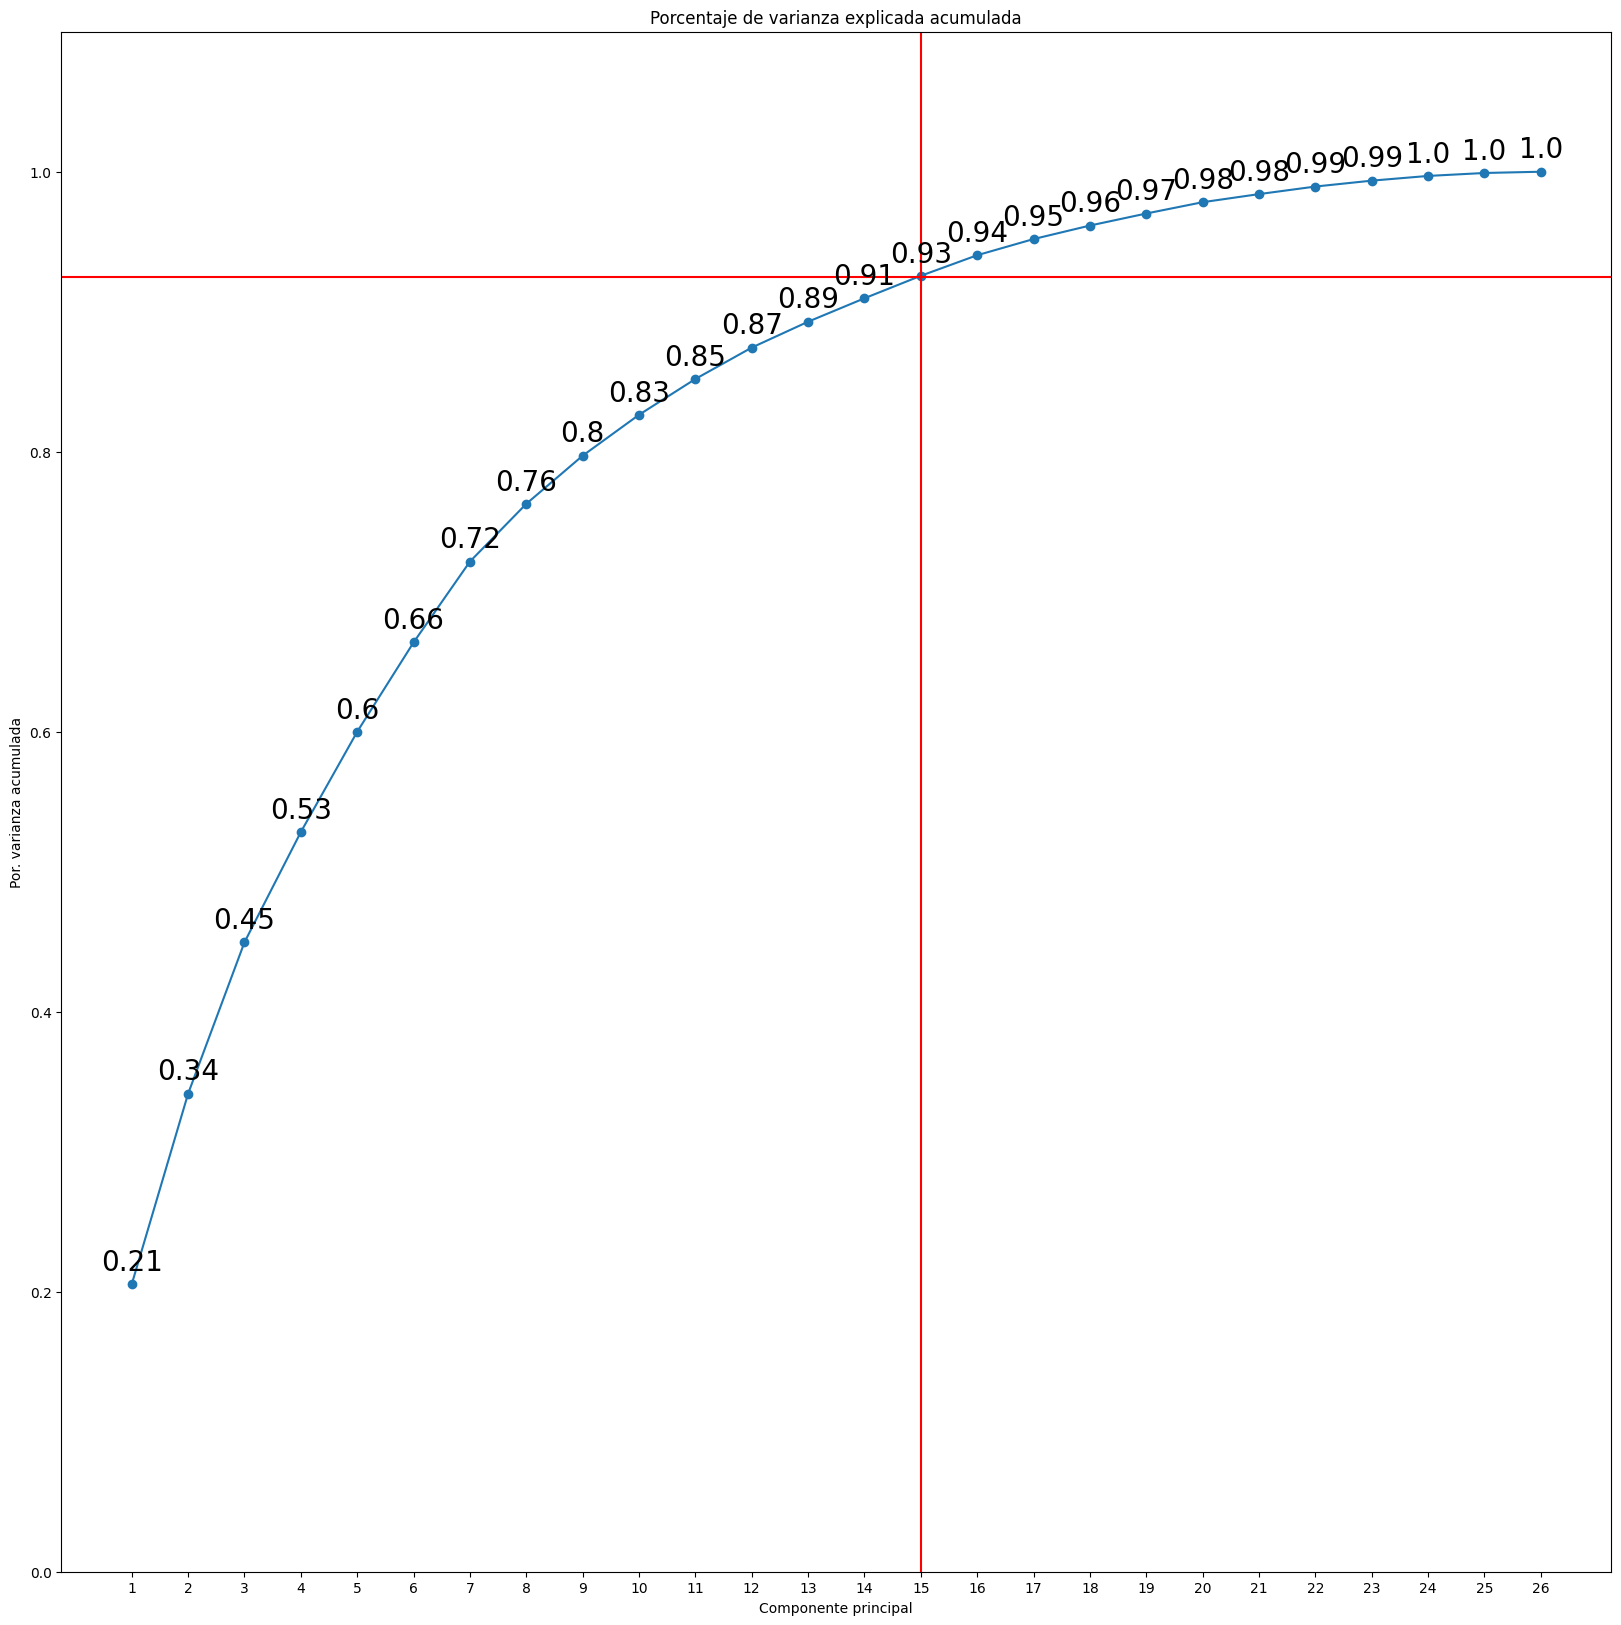

In [31]:
import matplotlib.pyplot as plt
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
ax.plot(
    np.arange(26) + 1,
    prop_varianza_acum,
    marker='o'
)

for x, y in zip(np.arange(26) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=20
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

ax.axvline(x=15, color="red")
ax.axhline(y=0.925, color="red")

plt.show()


In [32]:
"""
            Hallando el Normalizador y el PCA (92%)
"""

MINIMA_VARIANA_EXPLICADA = 0.92
scaler_pca = make_pipeline(StandardScaler(), PCA(MINIMA_VARIANA_EXPLICADA))
scaler_pca.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.92))])

In [33]:
import pickle
pickle.dump(scaler_pca, open('data/scaler_pca_to_use/scaler_pca.pkl','wb'))

## 1.3) Aplicando el normalizador, PCA a los datos train y guardando el resultado

In [34]:
"""
            Aplicando PCA
"""
X_train, Y_train = prepare_data_tensorflow(data_train)
aplicando_pca(scaler_pca, ARCHIVO_FINAL_TRAIN, X_train, Y_train )

## 1.4) Aplicando el normalizador, PCA a los datos test y guardando el resultado

In [35]:
print("Preprocesando TEST")
data_test = Preprocesar_audios(ARCHIVO_FINAL_TEST, False, save=False)
print("\tTime:", TIEMPO_SELECCIONADO, " - Test:", len(data_test))

X_test, Y_test = prepare_data_tensorflow(data_test)
aplicando_pca(scaler_pca, ARCHIVO_FINAL_TEST, X_test, Y_test )

Preprocesando TEST
/kaggle/input/musicnet-dataset/musicnet/musicnet/test_data/
/kaggle/input/musicnet-dataset/musicnet/musicnet/test_labels/
	Leyendo todos los archivos WAV originales

	. . . . . . . . . . 	Time: 2  - Input: (745, 88200)  - Output: (745, 11)  - rate: 44100
	Extrayendo caracteristicas audios

	...

/usr/local/lib/python3.8/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


...................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	......................................................................................................................................................
	.................................................................................................................................................	Convirtiendo a numpy
	Time: 2  - Test: 745


# 2) Cargando los datos para usarlos en el entrenamiento del modelo

In [72]:
"""
            Leyendo datos
"""
xTrain_for_model_charge, yTrain = leyendo_datos(ARCHIVO_FINAL_TRAIN)
print("x_for_model_charge_train:", xTrain_for_model_charge.shape, yTrain.shape)

x_for_model_charge_train: (60851, 15) (60851, 11)


In [73]:
xTest_for_model_charge, yTest = leyendo_datos(ARCHIVO_FINAL_TEST)
print("x_for_model_charge_test:", xTest_for_model_charge.shape, yTest.shape)

x_for_model_charge_test: (745, 15) (745, 11)


# 3) Creando y entrenando modelos modelos

## 3.1) Modelo clasico

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [62]:
mean = lambda lst: int((sum(lst) / len(lst))*100)/100


def calcular_porcentajes_aciertos(y_f, y_t):
    verdaderos = dict()
    falsos = dict()
    for j in range(y_f.shape[1]):
        verdaderos[j] = 0
        falsos[j] = 0

    for i in range(y_f.shape[0]):
        for j in range(y_f.shape[1]):
            if y_final[i][j] == y_t[i][j]:
                verdaderos[j] += 1
            else:
                falsos[j] += 1

    for j in range(y_f.shape[1]):
        #y_final.shape[1] -> 100%
        #verdaderos[j]    -> X
        verdaderos[j] = int(verdaderos[j] * 100 / y_f.shape[0])
        falsos[j] = int(falsos[j] * 100 / y_f.shape[0])

    return verdaderos, falsos, str(mean([v for i, v in verdaderos.items()])) + "%"

## 3.2) Entrenando modelo

In [38]:
X_train, X_test, y_train, y_test = train_test_split(xTrain_for_model_charge, yTrain, test_size=0.1)  # 0.2

In [42]:
algoritmo_clasico = RandomForestClassifier()
algoritmo_clasico = MultiOutputClassifier(algoritmo_clasico, n_jobs=-1)

seed = 1
grid = GridSearchCV(
          estimator = algoritmo_clasico,
          param_grid={},
          cv = KFold(n_splits=10, shuffle=True, random_state=seed)
        )
grid.fit(X_train, y_train)
algoritmo_clasico = grid.best_estimator_

## 3.3) Guardando modelo

In [59]:
pickle.dump(algoritmo_clasico, open('data/scaler_pca_to_use/randomforest.pkl', 'wb'))

## 3.4) Cargando modelo

In [74]:
model = pickle.load(open('data/scaler_pca_to_use/randomforest.pkl', 'rb'))

## 3.5) Probando modelo

In [75]:
y_final = model.predict(X_train)

aciertos = calcular_porcentajes_aciertos(y_final, y_train)[2]
print("Aciertos train", aciertos)

Aciertos train 99.72%


## 3.3) Validando modelo

In [76]:
y_final = model.predict(X_test)

aciertos = calcular_porcentajes_aciertos(y_final, y_test)[2]
print("Aciertos validacion", aciertos)

Aciertos validacion 95.54%


## 3.4) Testeando modelo

In [77]:
y_final = model.predict(xTest_for_model_charge)

aciertos = calcular_porcentajes_aciertos(y_final, yTest)[2]
print("Aciertos test", aciertos)

Aciertos test 94.9%


# 4) Creando y entrenando modelo red neuronal

In [78]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, LeakyReLU, Conv1D, Conv2D, Flatten, MaxPooling2D, Input
from tensorflow.keras.layers import BatchNormalization, InputLayer, Reshape, Activation, GlobalAveragePooling1D
from tensorflow.keras.layers import AveragePooling2D, AveragePooling1D, UpSampling1D, UpSampling2D, MaxPooling1D

In [79]:
from tensorflow.keras.optimizers import Adam
def get_optimizador():
    adam = Adam(learning_rate=1e-5)
    return adam

In [80]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, RemoteMonitor, TerminateOnNaN, BackupAndRestore

def get_callbacks(name="model"):
    #EarlyStopping, detener el entrenamiento una vez que su pérdida comienza a aumentar
    early_stop = EarlyStopping(
        monitor='accuracy',
        patience=8, #argumento de patience representa el número de épocas antes de detenerse una vez que su pérdida comienza a aumentar (deja de mejorar).
        min_delta=0,  #es un umbral para cuantificar una pérdida en alguna época como mejora o no. Si la diferencia de pérdida es inferior a min_delta , se cuantifica como no mejora. Es mejor dejarlo como 0 ya que estamos interesados ​​en cuando la pérdida empeora.
        restore_best_weights=True,
        mode='max')

    #ReduceLROnPlateau, que si el entrenamiento no mejora tras unos epochs específicos, reduce el valor de learning rate del modelo
    reduce_lr = ReduceLROnPlateau(
        monitor='loss', 
        factor=0.1, 
        patience=5, 
        min_delta=1e-4, 
        mode='min',
        verbose=1,
    )

    # Saves Keras model after each epoch
    #Para algunos casos es importante saber cual entrenamiento fue mejor, 
    #este callback guarda el modelo tras cada epoca completada con el fin de si luego se desea un registro de pesos para cada epoca
    #Se ha usado este callback para poder optener el mejor modelo de pesos, sobretodo en la red neuronal creada desde cero
    #siendo de gran utilidad para determinar el como ir modificando los layer hasta obtener el mejor modelo
    checkpointer = ModelCheckpoint(
        filepath='models_backup/' + name +'-{val_accuracy:.4f}.h5', 
        monitor='val_accuracy',
        verbose=1, 
        mode='max',
        save_best_only=True,
        save_weights_only=False
    )

    remote_monitor = RemoteMonitor(
        root='http://localhost:6006',
        path='/publish/epoch/end/',
        field='data',
        headers=None,
        send_as_json=False
    )
    
    backup_restore = BackupAndRestore(backup_dir="backup")
    
    proteccion_nan_loss = TerminateOnNaN()

    
    callbacks_list = [early_stop, reduce_lr, checkpointer, proteccion_nan_loss, backup_restore]#, remote_monitor]
    
    return callbacks_list

In [81]:
import matplotlib.pyplot as plt
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [96]:
cantidad_entradas = 15
cantidad_salidas = 11

model = Sequential(name="RedBasica")
model.add(Dense(32, activation='relu', input_shape=(cantidad_entradas,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(cantidad_salidas, activation='softmax', name='output_layer'))

model.summary()

Model: "RedBasica"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                512       
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                52

In [104]:
model.compile(optimizer=get_optimizador(),
              loss='mse',  # categorical_crossentropy sparse_categorical_crossentropy mean_squared_error
              metrics=['accuracy'])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(xTrain_for_model_charge, yTrain, test_size=0.1)  # 0.2

history = model.fit(
    X_train,
    y_train,
    #validation_data=(X_test, y_test),
    epochs=500,
    #batch_size=64,
    verbose=1,
    #callbacks=get_callbacks()
)

Epoch 1/500


UnimplementedError: Graph execution error:

Detected at node 'mean_squared_error/Cast' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-105-5dff57d7e08c>", line 3, in <module>
      history = model.fit(
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 1328, in mean_squared_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_squared_error/Cast'
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_5626]

In [92]:
plot_history(history)

NameError: name 'history' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Evaluate train acc: ', test_acc)

# Bibliografia usada